# Noise cancellation 

Let's see another use case of PCA: noise reduction. In this exercise, we will need to classify handwritten digits. Unfortunately, the dataset is extremely noisy. Let's see how PCA can help us!

1. Import `pandas` and then download data from these two urls: 
    * images 👉👉 <a href="https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+non+Supervis%C3%A9/PCA/noisy_digits.csv" target="_blank">Download</a>

    * labels 👉👉 <a href="https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+non+Supervis%C3%A9/PCA/noisy_digits_labels.csv" target="_blank">Download</a>

In [1]:
# Import pandas 
import pandas as pd 

# Get url of both csv files in a variable
url_X = "https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+non+Supervis%C3%A9/PCA/noisy_digits.csv"

url_y = "https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+non+Supervis%C3%A9/PCA/noisy_digits_labels.csv"

# Create pandas DataFrame
digits, labels = pd.read_csv(url_X), pd.read_csv(url_y)

# Visualize dataset
digits.head()

,Unnamed: 0,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,-176.321245,-52.743850,143.604939,-53.567749,80.289381,20.686379,-197.423519,-229.401206,-221.900009,...,34.407070,1.950735,-25.095565,133.684095,-21.664094,-94.305438,-55.987821,-89.929231,40.394774,-214.754480
1,1,-158.421239,16.371695,62.810879,263.533916,-193.920320,-25.366668,107.062706,125.403427,83.536343,...,-5.419961,-123.584030,20.240434,-25.699206,-128.545930,52.525885,-54.214887,-133.842624,-30.141215,210.408665
2,2,-290.343750,81.586500,12.615232,146.567851,111.233602,-188.989259,-101.464605,-107.015195,-13.069827,...,-139.909318,-85.214133,167.495617,62.402411,-144.402970,152.263950,-4.687051,-59.270131,-93.193600,188.229794
3,3,-208.840590,136.190431,38.552191,-67.825346,24.316303,176.103673,31.581298,-163.582673,29.777077,...,-131.385192,40.329733,-10.111639,163.497435,41.010287,-21.408008,328.274235,-15.341672,121.570863,151.757537
4,4,-328.876288,-42.862900,174.651874,-228.833439,71.909654,-97.206392,48.048853,-34.071313,3.820465,...,-135.713199,-71.396796,155.237981,-141.860908,155.657335,166.609760,-52.911774,267.150703,-36.749672,131.913772


In [2]:
digits.describe()

,Unnamed: 0,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000
mean,20999.50000,0.508865,0.161267,-0.136474,0.504606,-0.392227,-1.146996,0.065945,-0.932743,1.202804,...,0.329851,0.121329,-0.655444,-0.100407,0.276097,-0.140400,-0.625908,1.870961,-0.466101,-0.757627
std,12124.49999,125.424203,125.957019,124.814080,124.209803,125.421539,125.156993,124.927893,124.995896,125.198035,...,124.154492,124.397062,124.896809,124.596065,124.836661,125.616450,124.783298,125.710628,125.456830,125.542711
min,0.00000,-536.272379,-563.581377,-596.266187,-515.063938,-532.306749,-513.457210,-543.357776,-537.067105,-487.779478,...,-461.635368,-506.789421,-474.601499,-499.907780,-509.357382,-525.725612,-535.190814,-504.797562,-511.439969,-519.477568
25%,10499.75000,-83.800118,-84.915914,-84.807013,-82.854817,-85.834707,-84.970270,-83.641462,-85.161672,-82.887900,...,-84.349026,-83.802971,-85.491390,-84.701319,-84.307686,-84.130186,-84.127703,-83.530383,-84.919834,-85.620350
50%,20999.50000,0.860217,0.886333,0.763704,1.024988,-0.613646,-0.942170,0.750785,-1.703407,1.237868,...,-0.523211,0.359867,0.253873,-0.603624,0.632699,-0.794485,-0.848120,1.677145,-1.445551,-0.848889
75%,31499.25000,84.104507,84.746673,84.124227,84.558812,84.176809,83.098343,84.426144,83.654107,85.635613,...,84.494976,85.120277,83.715392,83.297809,85.881156,84.257741,84.000764,86.770448,83.957442,84.193126
max,41999.00000,498.641540,521.528036,505.180363,497.784712,557.447725,496.639090,502.002720,511.211431,501.472247,...,496.220224,506.105780,608.211734,533.828554,585.756919,484.635537,471.135960,581.003313,505.345850,515.791515


In [3]:
digits_bckup, labels_bckup = digits, labels

2. Remove first columns of labels and images 

In [4]:
# Remove 1 first column
digits = digits.iloc[:, 1:]
labels = labels.iloc[:, 1:]

3. Visualize images by using `numpy` and `matplotlib`
>  *    You can use `.reshape()` of `numpy` 👉 images are 28x28 pixels 😉
>  *   You can also use `.imshow` from `matplotlib to visualize images 

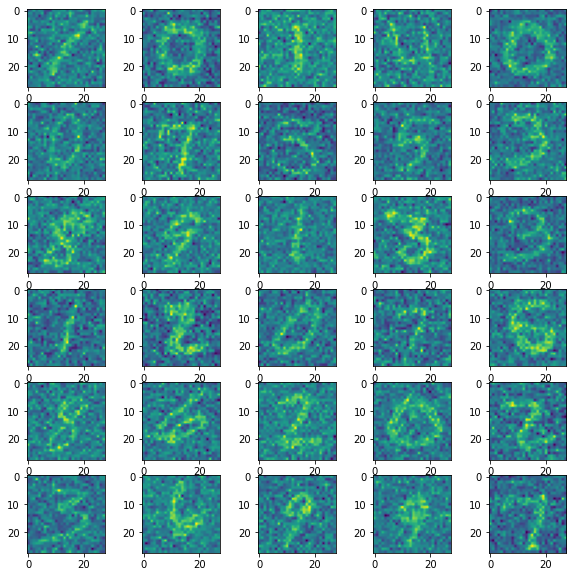

In [6]:
##### import matplotlib
import matplotlib.pyplot as plt 

# Create two variables within a subplot from matplotlib
fig, ax = plt.subplots(6, 5, figsize=(10,10))

# Create a for loop to visualize all digits
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.values[i].reshape(28, 28))

# Show image 
plt.show()

4. Use `train_test_split` from `sklearn` to split your dataset into a train and a test set.

In [7]:
# import train_test_split from model_selection in sklearn
from sklearn.model_selection import train_test_split

# Split into train and test set 
X_train, X_test, y_train, y_test = train_test_split(digits, labels, random_state=0)

# Visualize X
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5837,24.289180,45.983646,256.352134,-26.261889,11.683430,-205.429795,-137.313894,29.045135,95.337022,-90.620796,...,13.850705,50.352009,-28.988928,57.604085,36.024349,15.966126,9.261994,126.795466,-181.947605,-103.029471
26919,100.230434,44.166899,186.224206,307.291983,-266.608791,174.360175,-134.828176,215.091557,-205.003950,181.104424,...,143.917566,-33.805104,2.545959,-60.373496,65.902161,-185.317670,156.806654,-9.674685,-117.225176,47.191232
15177,-47.699431,-167.740414,238.069692,-98.327298,-224.500853,67.918157,1.317024,52.201427,117.235908,13.082838,...,62.499730,-78.223355,187.178508,-149.544457,186.401464,-55.541073,103.616753,318.404856,-229.352298,-34.503929
14046,-11.944284,-209.514843,113.523511,-5.111774,182.322677,73.826136,-77.099973,102.352925,60.394222,149.039467,...,-174.471094,42.355302,91.010817,-54.704095,-90.580398,81.801558,16.496764,-49.476950,253.968096,61.867205
22315,-85.086368,-133.186743,142.284695,-189.976676,-278.072652,130.695004,91.594462,33.159837,124.973469,-269.550718,...,23.206283,-227.845723,-64.189901,-132.225714,-126.693863,-76.637899,32.982080,-144.533851,116.305279,-75.537392


5. Normalize your train set and apply your normalization on your test set. 

In [8]:
# import StandardScaler 
from sklearn.preprocessing import StandardScaler

# Instanciate StandardScaler 
sc = StandardScaler()

# Fit standard scaler on X_train
X_sc_train = sc.fit_transform(X_train)

# Apply standard scaler to X_test
X_sc_test = sc.transform(X_test)

6. Import `SVC` from `sklearn.svm` and apply it on your dataset. Check out scores. 

In [9]:
# import SVM 
from sklearn.svm import SVC

# Apply SVC 
svc = SVC(random_state=0, verbose=True)

# Fit svc
svc.fit(X_train, y_train)

# Get score on test 
svc.score(X_test, y_test)

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[LibSVM]

0.8944761904761904

7. Import `PCA` from `sklearn.decomposition` and apply it on your train set. 
> Keep only 15% of the explained variance 

In [10]:
# Import PCA 
from sklearn.decomposition import PCA

# Only keep features that explains 15% of the variance
pca = PCA(.10)

# Fit model to X_train
X_pca_train = pca.fit_transform(X_sc_train)
X_pca_train[:5]

array([[-5.96208316, -0.42351373,  0.44470052,  0.57060786,  2.95242258,
        -1.17188072,  1.05069839, -0.13964367, -1.40303368, -2.92619999,
         0.38387206,  1.57951042, -0.54456549],
       [ 0.56433535, -1.22875461,  1.80909413, -2.79629372, -4.66531164,
         0.60056317, -1.57775989, -2.22058894, -0.82044612, -0.44829183,
         0.40847823, -1.15397558,  2.00880282],
       [-2.74876075,  0.57114036, -3.51933441, -1.01876267,  0.62326501,
         0.82822044, -0.02896527, -0.4580741 , -0.16667535,  4.56519067,
         0.75325915,  0.89821879, -0.92016151],
       [-2.35736473, -0.12577577, -1.94688851,  1.68370608, -4.65432857,
         5.51621668, -1.15504779,  1.41742162, -3.18671343,  2.80454839,
         0.6841405 ,  0.05205339,  0.63961574],
       [ 0.20698548, -4.81274701,  2.90348343,  4.22852925, -1.93502761,
         0.08684097,  0.63637024,  1.34539204,  1.92582796,  0.39527086,
        -1.84302689, -0.26067534, -3.43039347]])

8. Get the number of components 

In [11]:
# Get number of components
pca.components_[0].shape

(784,)

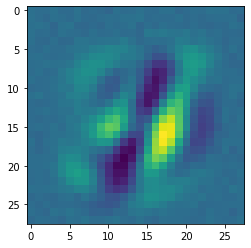

In [12]:
# Get number of components
plt.imshow(pca.inverse_transform(pca.components_[3][:13]).reshape(28,28))

In [13]:
pca.explained_variance_ratio_*100

array([1.78213381, 1.27086588, 1.15189942, 0.98670094, 0.88970455,
       0.79155582, 0.62481801, 0.56638889, 0.54030316, 0.47399032,
       0.43844119, 0.43196696, 0.37088206])

9. Apply PCA on your test set

In [14]:
# Transform X_test
X_pca_test = pca.transform(X_sc_test)
X_pca_test

array([[ 2.6491316 , -0.75974154,  7.93754891, ...,  1.64721785,
         1.8857297 , -1.97130382],
       [-1.55785053,  3.56492638, -1.64061527, ..., -3.02679   ,
        -1.97377365,  1.36121021],
       [-3.06767872,  5.21224128, -1.97658852, ..., -2.18662984,
         1.31071074,  1.54193635],
       ...,
       [-1.71394589,  2.19339732,  3.36030249, ..., -0.34881392,
         0.04000389,  0.32146327],
       [11.29534561, -0.64661267,  2.9625681 , ..., -1.59349459,
         0.74569828,  0.71080007],
       [ 3.58384581,  3.95782724,  6.30025409, ...,  3.87922446,
         0.85645358,  1.47063532]])

10. Visualize your new images after applying PCA
> NB: You will need to apply `.inverse_transform()` method on your PCA

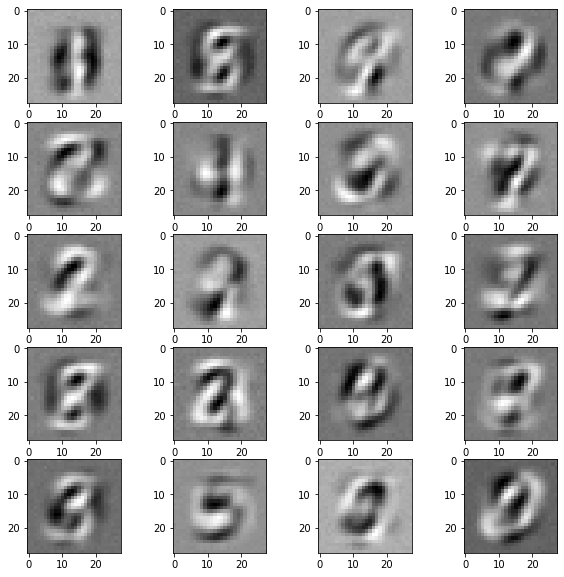

In [15]:
# Visualize images from X_pca_train
fig, ax = plt.subplots(5, 4, figsize=(10,10))

for i, axi in enumerate(ax.flat):
    axi.imshow(pca.inverse_transform(X_pca_train[i]).reshape(28, 28), cmap='gray')

plt.show()

11. Train a new SVM on your data after applying PCA. 

In [16]:
# Fit SVM again
svc.fit(X_pca_train, y_train)

# Get score
svc.score(X_pca_test, y_test)

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[LibSVM]

0.8999047619047619

In [17]:
### Not only we improve accuracy but training took wayyy less time! 